In [11]:
using UHDBindings
using Plots

In [12]:
# ---------------------------------------------------- 
# --- Physical layer and RF parameters 
# ---------------------------------------------------- 
carrierFreq	  = 868e6; 	# --- The carrier frequency (Hz)	
samplingRate  =  16e6;  # --- Targeted bandwidth (Hz)
rxGain		  =  30.0;  # --- Rx gain (dB)
nbSamples	  =  4096;  # --- Desired number of samples

In [13]:
# ---------------------------------------------------- 
# --- Getting all system with function calls  
# ---------------------------------------------------- 
# --- Creating the radio ressource 
radio	= openUHD(carrierFreq,samplingRate,rxGain);
# --- Display the current radio configuration
# Both Tx and Rx sides.
print(radio);

┌Rx Warning: Effective carrier frequency is 867.9999999999992 MHz and not 868.0 MHz
┌Tx Warning: Effective carrier frequency is 867.9999999999992 MHz and not 868.0 MHz
┌Rx: Current UHD Configuration in Rx mode
| Carrier Frequency: 868.000 MHz
| Sampling Frequency: 16.000 MHz
└  Rx Gain: 30.00 dB
┌Tx: Current UHD Configuration in Tx mode
| Carrier Frequency: 868.000 MHz
| Sampling Frequency: 16.000 MHz
└  Tx Gain: 30.00 dB


[INFO] [B200] Detected Device: B200mini
[INFO] [B200] Operating over USB 3.
[INFO] [B200] Initialize CODEC control...
[INFO] [B200] Initialize Radio control...
[INFO] [B200] Performing register loopback test... 
[INFO] [B200] Register loopback test passed
[INFO] [B200] Setting master clock rate selection to 'automatic'.
[INFO] [B200] Asking for clock rate 16.000000 MHz... 
[INFO] [B200] Actually got clock rate 16.000000 MHz.


In [14]:
# --- Getting a buffer from the radio 
sig	= recv(radio,nbSamples);

In [15]:
sig

4096-element Vector{ComplexF32}:
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
  0.00048829603f0 + 0.0f0im
   0.0009765921f0 - 0.00048829603f0im
  0.00094607356f0 + 0.0f0im
                  ⋮
  0.00048829603f0 - 0.00048829603f0im
            0.0f0 - 0.0014954066f0im
            0.0f0 + 0.0009765921f0im
  -0.0014954066f0 + 0.00048829603f0im
  0.00048829603f0 + 0.0014648881f0im
 -0.00048829603f0 + 0.0f0im
  -0.0014648881f0 + 0.0f0im
 -0.00048829603f0 - 0.00048829603f0im
 -0.00048829603f0 + 0.00048829603f0im
  -0.0019531841f0 + 0.0014648881f0im
 -0.00048829603f0 - 0.00048829603f0im
  -0.0014954066f0 + 0.0f0im

In [16]:
# This also can be done with pre-allocation 
buffer = zeros(Complex{Cfloat},nbSamples);
recv!(buffer,radio);

In [17]:
buffer

4096-element Vector{ComplexF32}:
 -0.00048829603f0 - 0.00051881454f0im
  0.00048829603f0 + 0.00048829603f0im
  0.00048829603f0 - 0.0009765921f0im
 -0.00048829603f0 + 0.00048829603f0im
 -0.00048829603f0 + 0.0f0im
  -0.0009765921f0 + 0.0009765921f0im
 -0.00048829603f0 - 0.0009765921f0im
   0.0024109615f0 - 0.0024719986f0im
     0.00244148f0 + 0.0f0im
 -0.00048829603f0 - 0.0019531841f0im
 -0.00048829603f0 + 0.00048829603f0im
 -0.00048829603f0 + 0.0f0im
 -0.00048829603f0 - 0.00048829603f0im
                  ⋮
   0.0014648881f0 + 0.00045777753f0im
   0.0014648881f0 - 0.0009765921f0im
 -0.00048829603f0 + 0.0009765921f0im
            0.0f0 + 0.0f0im
   0.0014648881f0 + 0.0f0im
  0.00048829603f0 + 0.00048829603f0im
  0.00045777753f0 - 3.0518502f-5im
  0.00048829603f0 + 0.0f0im
   0.0009765921f0 + 0.00048829603f0im
   0.0019531841f0 - 0.0009765921f0im
   0.0009765921f0 - 3.0518502f-5im
 -0.00048829603f0 + 0.00048829603f0im

In [18]:
# --- Release the radio ressources
close(radio); 

[ Info: USRP device is now closed.


In [19]:
# --- Output to signal 
sig;

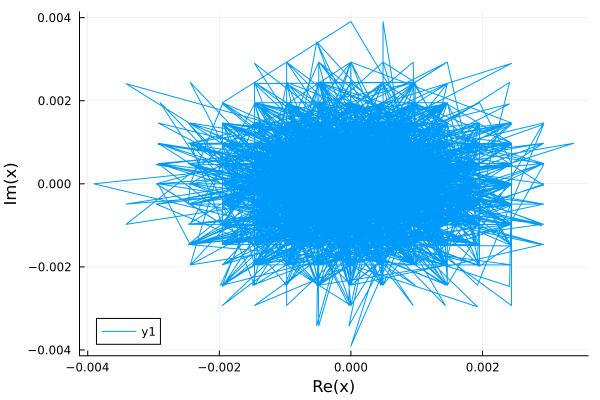

In [20]:
plot(buffer)